# Correlation function of DR72 SDSS VAGC Catalog

First import all the modules such as healpy and astropy needed for analyzing the structure

In [1]:
import healpix_util as hu
import astropy as ap
import numpy as np
from astropy.io import fits
from astropy.table import Table
import astropy.io.ascii as ascii
from astropy.io import fits
from astropy.constants import c
import matplotlib.pyplot as plt
import math as m
from math import pi
import scipy.special as sp
from scipy import integrate
import warnings
from sklearn.neighbors import BallTree
import pickle
import pymangle
from scipy.optimize import curve_fit
from progressbar import *
from tqdm import *
from functools import partial
import pymangle
from scipy.stats import gaussian_kde
from __future__ import division
%matplotlib inline

In [2]:
dr7full=ascii.read("./input/DR7-Full.ascii")
dr7full

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
56.1604523761,-0.221359772462,0.4501842,-22.0970516205,0.9943343,0.310859,1.7112147,1.0,0.9901478,32763,33480,784
58.247844859,0.216329004672,0.3671646,-21.8688602448,0.9533011,0.7922078,0.9208817,1.0,0.9506173,303471,311902,3790
54.445380928,0.619974218725,0.4133244,-21.7306137085,1.0,0.4315305,1.4082278,1.0,0.9183673,43630,44552,779
54.4879828915,0.485825651457,0.3224697,-21.8775806427,1.0,0.9240486,0.8174705,1.0,0.9183673,43622,44544,779
54.4932987631,0.483249792951,0.3226457,-21.6763000488,1.0,0.9249313,0.8168564,1.0,0.9183673,43622,44544,779
55.5558858448,0.582441686132,0.2334688,-21.5131568909,0.9943343,1.0009493,0.7672175,1.0,0.9901478,43723,44650,784
55.5686146471,0.608277412471,0.3136448,-21.5073776245,0.9943343,0.8425107,0.8784812,1.0,0.9901478,43727,44654,784
55.5972002797,0.434026434704,0.3517163,-21.5829257965,0.9943343,0.8903325,0.8416406,1.0,0.9901478,43731,44658,784
55.7617273511,0.495315330472,0.403208,-21.3501148224,0.9943343,0.4957986,1.2868758,1.0,0.9901478,43740,44667,784


In [3]:
z=dr7full['col3']
rad=dr7full['col1']
decd=dr7full['col2']

In [4]:
#Ez = lambda x: 1.0/m.sqrt(0.3*(1+x)**3+0.7)
Om=0.279
Ol=0.721
Ok=0.0
def Ez(zv):
    return 1.0/m.sqrt(Om*(1.0+zv)**3+Ok*(1.0+zv)**2+Ol)

np.vectorize(Ez)
#Calculate comoving distance of a data point using the Redshift - This definition is based on the cosmology model we take. Here the distance for E-dS universe is considered. Also note that c/H0 ratio is cancelled in the equations and hence not taken.

In [5]:
def DC_LCDM(z):
  return integrate.quad(Ez, 0, z)[0]
DC_LCDM=np.vectorize(DC_LCDM)

In [6]:
DC_LCDM(2.0)

array(1.232048694433717)

In [7]:
DC=DC_LCDM(z)
DC

0.405059971004
0.337292380754
0.37535589107
0.29951224831
0.299662811644
0.221552822632
0.29194457377
0.32433731955
0.367096478057
0.345409089706
0.162550123776


In [8]:
dr7f = open("./output/DR72srarfwmap9.dat",'w')
dr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dr7full)):
    dr7f.write("%f\t " %z[i])
    dr7f.write("%f\t %f\t " %(rad[i],decd[i]))
    dr7f.write("%f\t " %DC[i])
    dr7f.write("%f\t %f\n " %(rad[i]*pi/180.0,decd[i]*pi/180.0))
dr7f.close()

In [2]:
data=ascii.read("./output/DR72srarfwmap9.dat")

In [9]:
data['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [10]:
data['s']

0.40506
0.337292
0.375356
0.299512
0.299663
0.221553
0.291945
0.324337
0.367096
0.345409
0.16255


In [11]:
data['rar']

0.980185
1.016617
0.950251
0.950995
0.951087
0.969633
0.969855
0.970354
0.973226
0.974112
0.97513


In [12]:
data['decr']

-0.003863
0.003776
0.010821
0.008479
0.008434
0.010166
0.010616
0.007575
0.008645
0.009094
0.008617


In [15]:
NSIDE=512
dr72hpix=hu.HealPix("ring",NSIDE)

In [16]:
pixdata = open("./output/pixdatadr72VAGCfullwmap9.dat",'w')
pixdata.write("z\t pix \n")

for i in range(0,len(data)):
    pixdata.write("%f\t" %data['z'][i])
    pixdata.write("%d\n" %dr72hpix.eq2pix(data['ra'][i],data['dec'][i]))
pixdata.close()

In [17]:
pixdata = ascii.read("./output/pixdatadr72VAGCfullwmap9.dat")
hpixdata=np.array(np.zeros(hu.nside2npix(NSIDE)))
for j in range(len(pixdata)):
    hpixdata[pixdata[j]['pix']]+=1

In [18]:
hpixdata

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

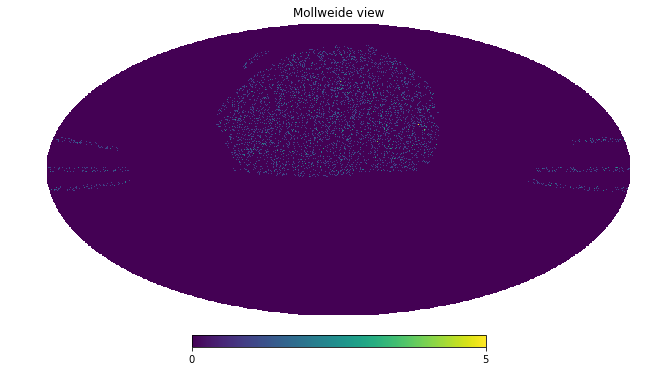

In [19]:
hu.mollview(hpixdata,rot=180)

In [ ]:
mangle=pymangle.Mangle("./masks/")

Ref: https://pypi.python.org/pypi/pymangle/

In [ ]:
%%time
rar,decr=mangle.genrand(2*len(data))

In [13]:
dataR=ascii.read("./output/rand200kdr72.dat")

In [14]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [15]:
dataR['ra']

171.460447
156.861634
135.655956
151.1135
327.045321
222.706587
132.163348
214.239217
310.627283
143.795051
168.941476


In [16]:
dataR['dec']

14.210816
40.750823
19.592957
24.245002
-7.737766
21.927202
15.281744
5.973424
1.01386
15.993848
43.319462


In [17]:
def kde(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def generate_rand_from_pdf(pdf, x_grid, N):
    cdf = np.cumsum(pdf)
    cdf = cdf / cdf[-1]
    values = np.random.rand(N)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = x_grid[value_bins]
    return random_from_cdf

In [18]:
z=np.array(data['z'])
z

array([ 0.450184,  0.367165,  0.413324, ...,  0.368113,  0.22131 ,  0.34707 ])

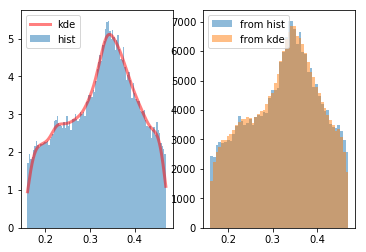

In [19]:
%%time
hist, bins = np.histogram(z, bins=1000)
N=len(dataR)

x_grid = np.linspace(min(z), max(z), N)
kdepdf = kde(z, x_grid, bandwidth=0.01)
random_from_kde = generate_rand_from_pdf(kdepdf, x_grid, N)

bin_midpoints = bins[:-1] + np.diff(bins) / 2
zr=random_from_cdf = generate_rand_from_pdf(hist, bin_midpoints, N)

plt.subplot(121)
plt.hist(z, 100, normed=True, alpha=0.5, label='hist')
plt.plot(x_grid, kdepdf, color='r', alpha=0.5, lw=3, label='kde')
plt.legend()
plt.subplot(122)
plt.hist(random_from_cdf, 50, alpha=0.5, label='from hist')
plt.hist(random_from_kde, 50, alpha=0.5, label='from kde')
plt.legend()
plt.show()

(array([  6709.,   7702.,   9090.,   9435.,  11252.,  15976.,  15887.,
         12406.,   9497.,   7877.]),
 array([ 0.160002 ,  0.1910014,  0.2220008,  0.2530002,  0.2839996,
         0.314999 ,  0.3459984,  0.3769978,  0.4079972,  0.4389966,
         0.469996 ]),
 <a list of 10 Patch objects>)

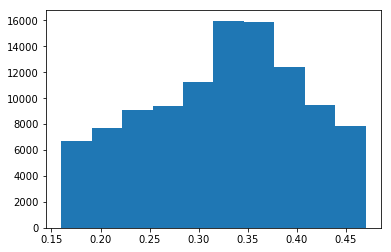

In [20]:
plt.hist(z)

(array([ 13433.,  15511.,  18171.,  18806.,  22408.,  32105.,  31479.,
         24904.,  19094.,  15750.]),
 array([ 0.160157 ,  0.1911254,  0.2220938,  0.2530622,  0.2840306,
         0.314999 ,  0.3459674,  0.3769358,  0.4079042,  0.4388726,
         0.469841 ]),
 <a list of 10 Patch objects>)

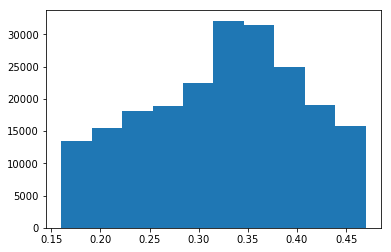

In [21]:
plt.hist(zr)

In [22]:
DCr=DC_LCDM(zr)
DCr

array([ 0.35228993,  0.36199889,  0.41083649, ...,  0.23966027,
        0.29190953,  0.41991845])

In [23]:
rdr7f = open("./output/rDR72srarfwmap9pfinal.dat",'w')
rdr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dataR)):
    rdr7f.write("%f\t " %zr[i])
    rdr7f.write("%f\t %f\t " %(dataR['ra'][i],dataR['dec'][i]))
    rdr7f.write("%f\t " %DCr[i])
    rdr7f.write("%f\t %f\n " %(dataR['ra'][i]*pi/180.0,dataR['dec'][i]*pi/180.0))
rdr7f.close()

In [3]:
dataR=ascii.read("./output/rDR72srarfwmap9pfinal.dat")

In [25]:
dataR['z']

0.385213
0.396992
0.457441
0.218126
0.355143
0.196736
0.363203
0.301204
0.426752
0.390483
0.300274


In [4]:
dat=ascii.read("./output/DR72srarfwmap9.dat")

In [5]:
dat=np.array([dat['s'],dat['rar'],dat['decr']])

In [6]:
dat.reshape(3,len(data['s']))

array([[ 0.40506 ,  0.337292,  0.375356, ...,  0.338084,  0.21062 ,
         0.32042 ],
       [ 0.980185,  1.016617,  0.950251, ...,  2.830242,  2.831786,
         2.838233],
       [-0.003863,  0.003776,  0.010821, ...,  0.172112,  0.173661,
         0.173055]])

In [7]:
dat=dat.transpose()

In [8]:
dat

array([[ 0.40506 ,  0.980185, -0.003863],
       [ 0.337292,  1.016617,  0.003776],
       [ 0.375356,  0.950251,  0.010821],
       ..., 
       [ 0.338084,  2.830242,  0.172112],
       [ 0.21062 ,  2.831786,  0.173661],
       [ 0.32042 ,  2.838233,  0.173055]])

In [9]:
from lcdmdist import *

In [10]:
LCDMmetricsq(dat[0],dat[1])

0.004781790741834768

In [11]:
bins=np.arange(0.005,0.08,0.0025)

In [12]:
print bins

[ 0.005   0.0075  0.01    0.0125  0.015   0.0175  0.02    0.0225  0.025
  0.0275  0.03    0.0325  0.035   0.0375  0.04    0.0425  0.045   0.0475
  0.05    0.0525  0.055   0.0575  0.06    0.0625  0.065   0.0675  0.07
  0.0725  0.075   0.0775]


In [42]:
Nbins=len(bins)

In [43]:
Nbins

30

In [13]:
%%time
BT_D = BallTree(dat,metric='pyfunc',func=LCDMmetricsq,leaf_size=15) 

with open('BTDdr72wmap9f.pkl', 'w') as f:
    pickle.dump(BT_D,f)

CPU times: user 4.5 s, sys: 39.8 ms, total: 4.54 s
Wall time: 4.55 s


In [14]:
with open('./BTDdr72wmap9f.pkl') as f:
    BTD = pickle.load(f)
    
BTD

In [15]:
binsq=bins**2
binsq

array([  2.50000000e-05,   5.62500000e-05,   1.00000000e-04,
         1.56250000e-04,   2.25000000e-04,   3.06250000e-04,
         4.00000000e-04,   5.06250000e-04,   6.25000000e-04,
         7.56250000e-04,   9.00000000e-04,   1.05625000e-03,
         1.22500000e-03,   1.40625000e-03,   1.60000000e-03,
         1.80625000e-03,   2.02500000e-03,   2.25625000e-03,
         2.50000000e-03,   2.75625000e-03,   3.02500000e-03,
         3.30625000e-03,   3.60000000e-03,   3.90625000e-03,
         4.22500000e-03,   4.55625000e-03,   4.90000000e-03,
         5.25625000e-03,   5.62500000e-03,   6.00625000e-03])

In [16]:
%%time
counts_DD=BTD.two_point_correlation(dat,binsq)
print counts_DD

[   402929    774497   1364119   2237086   3458152   5093053   7210625
   9866681  13145795  17103872  21820618  27365402  33818809  41226191
  49633510  59101950  69686730  81431002  94385209 108550237 123968200
 140715893 158788908 178220065 198993309 221189433 244838889 269911660
 296471916 324567634]
CPU times: user 21min 50s, sys: 2.32 s, total: 21min 53s
Wall time: 21min 55s


In [17]:
with open('./DDDr72wmap9f.pkl', 'w') as f:
    pickle.dump(counts_DD,f)

In [29]:
with open('./DDDr72wmap9f.pkl') as f:
    counts_DD = pickle.load(f)
    
counts_DD

array([   402929,    774497,   1364119,   2237086,   3458152,   5093053,
         7210625,   9866681,  13145795,  17103872,  21820618,  27365402,
        33818809,  41226191,  49633510,  59101950,  69686730,  81431002,
        94385209, 108550237, 123968200, 140715893, 158788908, 178220065,
       198993309, 221189433, 244838889, 269911660, 296471916, 324567634])

In [30]:
DD=np.diff(counts_DD)
DD

array([  371568,   589622,   872967,  1221066,  1634901,  2117572,
        2656056,  3279114,  3958077,  4716746,  5544784,  6453407,
        7407382,  8407319,  9468440, 10584780, 11744272, 12954207,
       14165028, 15417963, 16747693, 18073015, 19431157, 20773244,
       22196124, 23649456, 25072771, 26560256, 28095718])

In [31]:
dataR=ascii.read("./output/rDR72srarfwmap9pfinal.dat")

In [32]:
dataR['z']

0.385213
0.396992
0.457441
0.218126
0.355143
0.196736
0.363203
0.301204
0.426752
0.390483
0.300274


In [33]:
datR=np.array([dataR['s'],dataR['rar'],dataR['decr']])

In [34]:
datR.reshape(3,len(dataR['s']))

array([[ 0.35229 ,  0.361999,  0.410836, ...,  0.23966 ,  0.29191 ,
         0.419918],
       [ 2.992549,  2.737752,  2.367643, ...,  3.228052,  3.218296,
         4.056418],
       [ 0.248026,  0.711236,  0.341962, ...,  0.199013,  0.052979,
         0.170602]])

In [35]:
datR=datR.transpose()

In [36]:
datR

array([[ 0.35229 ,  2.992549,  0.248026],
       [ 0.361999,  2.737752,  0.711236],
       [ 0.410836,  2.367643,  0.341962],
       ..., 
       [ 0.23966 ,  3.228052,  0.199013],
       [ 0.29191 ,  3.218296,  0.052979],
       [ 0.419918,  4.056418,  0.170602]])

In [40]:
LCDMmetricsq(datR[0],datR[1])

0.03301879531456095

In [41]:
%%time
BT_R = BallTree(datR,metric='pyfunc',func=LCDMmetricsq,leaf_size=15) 

with open('BTRdr72wmap9pfinal.pkl', 'w') as f:
    pickle.dump(BT_R,f)

CPU times: user 9.5 s, sys: 108 ms, total: 9.6 s
Wall time: 9.81 s


In [42]:
with open('./BTRdr72wmap9pfinal.pkl') as f:
    BTR = pickle.load(f)
    
BTR

In [43]:
%%time
counts_RR=BTR.two_point_correlation(datR,binsq)
print counts_RR

[    663127    1688490    3618479    6703663   11192617   17314123
   25336062   35539319   48229999   63725986   82306432  104179543
  129612486  158796990  191940637  229248098  270872912  317026476
  367845790  423390126  483857678  549422156  620245010  696290582
  777783177  864746446  957249790 1055266125 1158849151 1268139841]
CPU times: user 1h 7min 24s, sys: 8.22 s, total: 1h 7min 33s
Wall time: 1h 7min 40s


In [44]:
with open('./RRDr72wmap9pfinal.pkl', 'w') as f:
    pickle.dump(counts_RR,f)

In [45]:
with open('./RRDr72wmap9pfinal.pkl') as f:
    counts_RR = pickle.load(f)
    
counts_RR

array([    663127,    1688490,    3618479,    6703663,   11192617,
         17314123,   25336062,   35539319,   48229999,   63725986,
         82306432,  104179543,  129612486,  158796990,  191940637,
        229248098,  270872912,  317026476,  367845790,  423390126,
        483857678,  549422156,  620245010,  696290582,  777783177,
        864746446,  957249790, 1055266125, 1158849151, 1268139841])

In [46]:
RR=np.diff(counts_RR)
RR

array([  1025363,   1929989,   3085184,   4488954,   6121506,   8021939,
        10203257,  12690680,  15495987,  18580446,  21873111,  25432943,
        29184504,  33143647,  37307461,  41624814,  46153564,  50819314,
        55544336,  60467552,  65564478,  70822854,  76045572,  81492595,
        86963269,  92503344,  98016335, 103583026, 109290690])

In [55]:
%%time
counts_DR=BTR.two_point_correlation(dat,binsq)
print counts_DR

[   223985    735125   1699698   3245151   5494691   8570839  12606458
  17751395  24152302  31970372  41334961  52372325  65191156  79939926
  96686499 115544271 136591999 159915104 185627260 213785267 244417930
 277623461 313493565 352021836 393275579 437348869 484263521 534048938
 586623134 642069401]
CPU times: user 31min 59s, sys: 3.45 s, total: 32min 2s
Wall time: 32min 6s


In [56]:
with open('./DRDr72wmap9pfinal.pkl', 'w') as f:
    pickle.dump(counts_DR,f)

In [57]:
with open('./DRDr72wmap9pfinal.pkl') as f:
    counts_DR = pickle.load(f)
    
counts_DR

array([   223985,    735125,   1699698,   3245151,   5494691,   8570839,
        12606458,  17751395,  24152302,  31970372,  41334961,  52372325,
        65191156,  79939926,  96686499, 115544271, 136591999, 159915104,
       185627260, 213785267, 244417930, 277623461, 313493565, 352021836,
       393275579, 437348869, 484263521, 534048938, 586623134, 642069401])

In [58]:
DR=np.diff(counts_DR)
DR

array([  511140,   964573,  1545453,  2249540,  3076148,  4035619,
        5144937,  6400907,  7818070,  9364589, 11037364, 12818831,
       14748770, 16746573, 18857772, 21047728, 23323105, 25712156,
       28158007, 30632663, 33205531, 35870104, 38528271, 41253743,
       44073290, 46914652, 49785417, 52574196, 55446267])

In [59]:
correl=(4.0*DD-4.0*DR+1.0*RR)/(1.0*RR)

In [60]:
correl

array([ 0.45552161,  0.22289505,  0.12810905,  0.08355131,  0.05824024,
        0.04359931,  0.0242798 ,  0.01603602,  0.00361481, -0.00058804,
       -0.00444422, -0.00113054, -0.00620357, -0.0064377 , -0.00669751,
       -0.00545295, -0.00350499, -0.00418113, -0.00769799, -0.00647038,
       -0.00407041, -0.00516079, -0.00450893, -0.0052692 , -0.00627156,
       -0.00602616, -0.00851133, -0.00456382, -0.00102027])

In [61]:
binMpc=c*1e-5*bins[1:len(bins)]
print binMpc

[  22.48443435   29.9792458    37.47405725   44.9688687    52.46368015
   59.9584916    67.45330305   74.9481145    82.44292595   89.9377374
   97.43254885  104.9273603   112.42217175  119.9169832   127.41179465
  134.9066061   142.40141755  149.896229    157.39104045  164.8858519
  172.38066335  179.8754748   187.37028625  194.8650977   202.35990915
  209.8547206   217.34953205  224.8443435   232.33915495] m / s


In [78]:
binMpc=np.array(binMpc)
binMpc

array([  22.48443435,   29.9792458 ,   37.47405725,   44.9688687 ,
         52.46368015,   59.9584916 ,   67.45330305,   74.9481145 ,
         82.44292595,   89.9377374 ,   97.43254885,  104.9273603 ,
        112.42217175,  119.9169832 ,  127.41179465,  134.9066061 ,
        142.40141755,  149.896229  ,  157.39104045,  164.8858519 ,
        172.38066335,  179.8754748 ,  187.37028625,  194.8650977 ,
        202.35990915,  209.8547206 ,  217.34953205,  224.8443435 ,
        232.33915495])

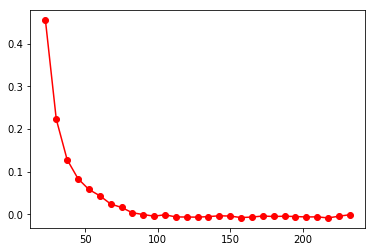

In [62]:
plt.plot(binMpc,correl,'ro-')

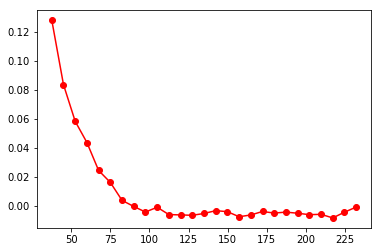

In [63]:
plt.plot(binMpc[2:],correl[2:],'ro-')

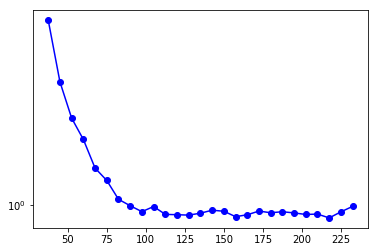

In [66]:
plt.yscale('log')
plt.plot(binMpc[2:],correl[2:]+1.0,'bo-')
plt.show()

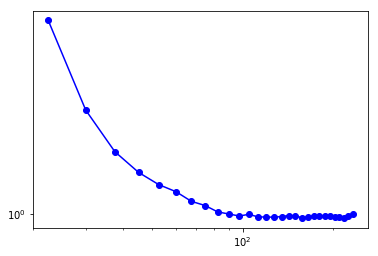

In [65]:
plt.xscale('log')
plt.yscale('log')
plt.plot(binMpc,correl+1.0,'bo-')
plt.show()

In [67]:
errc=(1.0+correl)/np.sqrt(DD)
errc

array([ 0.00238781,  0.00159258,  0.0012074 ,  0.00098057,  0.00082763,
        0.00071716,  0.00062849,  0.00056109,  0.00050446,  0.00046018,
        0.00042279,  0.0003932 ,  0.00036514,  0.00034266,  0.00032281,
        0.00030569,  0.00029078,  0.00027668,  0.00026365,  0.00025303,
        0.00024336,  0.00023401,  0.00022583,  0.00021825,  0.00021093,
        0.00020439,  0.00019801,  0.00019315,  0.00018847])

<Container object of 3 artists>

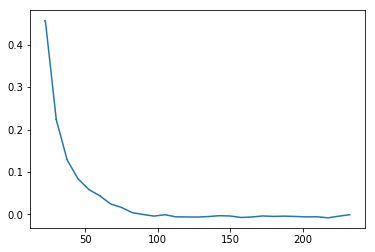

In [79]:
plt.errorbar(binMpc,correl,yerr=errc)

<Container object of 3 artists>

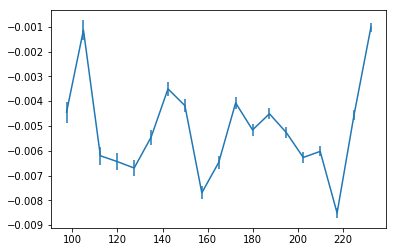

In [81]:
plt.errorbar(binMpc[10:],correl[10:],yerr=errc[10:])

In [70]:
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt=u'', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)
    Plot an errorbar graph.
    
    Plot x versus y with error deltas in yerr and xerr.
    Vertical errorbars are plotted if yerr is not None.
    Horizontal errorbars are plotted if xerr is not None.
    
    x, y, xerr, and yerr can all be scalars, which plots a
    single error bar at x, y.
    
    Parameters
    ----------
    x : scalar or array-like
    y : scalar or array-like
    
    xerr/yerr : scalar or array-like, shape(N,) or shape(2,N), optional
        If a scalar number, len(N) array-like object, or a N-element
        array-like object, errorbars are drawn at +/-value relative
        to the data. Default is None.
    
        If a sequence of shape 2xN, errorbars are drawn at -row1
      